In [2]:
!pip install cmake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install dlib
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 12.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=91087464f31314d1cdb47ed264996c92b5dd081f7efebfee8980da4ad4269d3d
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [4]:
import cv2
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir('/content/drive/MyDrive/saira/face_recognition')
HOME = os.getcwd()

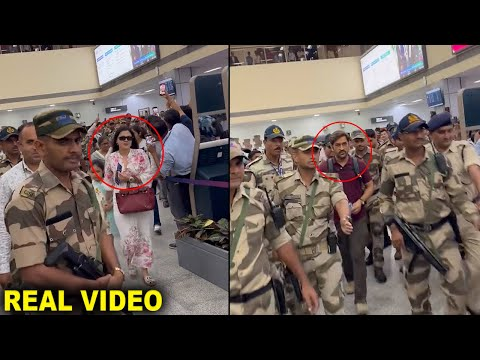

In [ ]:
from IPython.display import YouTubeVideo

video_id = '40_qKVcF9bU'
video = YouTubeVideo(video_id)
display(video)

In [ ]:
video_url = f'https://www.youtube.com/watch?v={video_id}'

!pip install git+https://github.com/ytdl-org/youtube-dl.git
!python -m youtube_dl -f 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4' "$video_url"
print('Video downloaded successfully')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ytdl-org/youtube-dl.git to /tmp/pip-req-build-tqz3d2kv
  Running command git clone --filter=blob:none --quiet https://github.com/ytdl-org/youtube-dl.git /tmp/pip-req-build-tqz3d2kv
  Resolved https://github.com/ytdl-org/youtube-dl.git to commit a2534f7b888416e872d5afd1862eb3e30fc69fc7
  Preparing metadata (setup.py) ... done
  Created wheel for youtube-dl: filename=youtube_dl-2021.12.17-py2.py3-none-any.whl size=1921981 sha256=f321f7887d7510d74dacf93270023a02fa09770b60e2c0e9e9a74b1b629993f7
  Stored in directory: /tmp/pip-ephem-wheel-cache-_dvf9lz9/wheels/64/8e/40/866e846163e3e4859bbe820ff8847ec97f4320864f1525aa9a
Successfully built youtube-dl
[youtube] 40_qKVcF9bU: Downloading webpage
[youtube] 40_qKVcF9bU: Downloading player 0c9b5d20
[dashsegments] Total fragments: 3
[download] Destination: MS Dhoni and Wife Sakshi return home after Won IPL Trophy, Watch Vid

In [7]:
input_movie = cv2.VideoCapture(f"{HOME}/sample_video.mp4")
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

In [8]:
width = int(input_movie.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(input_movie.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(input_movie.get(cv2.CAP_PROP_FPS))

In [9]:
output_file = f'{HOME}/detections.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, frame_rate, (width, height))

In [10]:
# test image path
test_img = cv2.imread(f'{HOME}/dhoni.jpg')

In [11]:
face_locations = []
face_encodings = []
face_names = []
frame_number = 0

while True:
    ret, frame = input_movie.read()
    frame_number += 1

    if not ret:
        break

    rgb_frame = frame[:, :, ::-1]





    match = DeepFace.verify(rgb_frame, test_img, model_name = "Facenet512", enforce_detection = False)
    face_coord = match['facial_areas']['img1']
    face_locations = (face_coord['x'], face_coord['y'],
                         face_coord['w'], face_coord['h'])
    name = None
    if match['verified'] == True:
      name = "MS Dhoni"

    face_names.append(name)

    # Label the results
    for name in face_names:
        if not name:
            continue
        (x, y, w, h) = face_locations
        # Draw a box around the face
        cv2.rectangle(frame, (x, y+h), (x+w, y), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (x, y+h - 25), (x+w, y), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (x + 6, y - 6), font, 0.5, (255, 255, 255), 1)

    # Write the resulting image to the output video file
    # print("Writing frame {} / {}".format(frame_number, length))
    out.write(frame)

facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:04<00:00, 19.0MB/s]


In [12]:
display(out)

< cv2.VideoWriter 0x7fc06b96a650>

In [14]:
out.release()
cv2.destroyAllWindows()

In [43]:
face_locations = []
face_encodings = []
face_names = []
frame_number = 0

while frame_number==0:
    frame = cv2.imread(f'{HOME}/test.png')
    frame_number += 1


    rgb_frame = frame[:, :, ::-1]





    match = DeepFace.verify(rgb_frame, test_img, model_name = "Facenet512", enforce_detection = False)
    face_coord = match['facial_areas']['img1']
    face_locations = (face_coord['x'], face_coord['y'],
                         face_coord['w'], face_coord['h'])
    name = None
    if match['verified'] == True:
      name = "MS Dhoni"

    face_names.append(name)

    # Label the results
    for name in face_names:
        if not name:
            continue
        (x, y, w, h) = face_locations
        # Draw a box around the face
        cv2.rectangle(frame, (x, y+h), (x+w, y), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (x, y+1), (x+w, y), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (x + 6, y - 6), font, 0.5, (255, 255, 255), 1)

    # Write the resulting image to the output video file
    # print("Writing frame {} / {}".format(frame_number, length))
    # cv_imshow(frame)

In [44]:
match

{'verified': True,
 'distance': 0.2928394635713031,
 'threshold': 0.3,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 202, 'y': 15, 'w': 56, 'h': 56},
  'img2': {'x': 231, 'y': 129, 'w': 173, 'h': 173}},
 'time': 0.35}

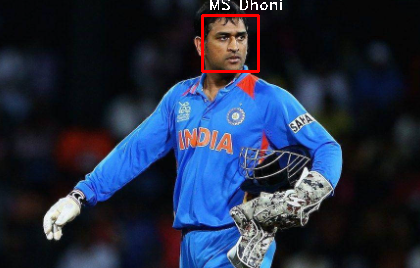

In [45]:
from google.colab.patches import cv2_imshow
cv2_imshow(frame)